# U.S. Medical Insurance Costs

Update to version 3:
Instead of using csv package, lists and dictionaries, I am now using NumPy and Pandas DataFrame structure.

There are some analyses that are probably unnecessary, but I've included them to highlight some of the coding skills I've learnt so far.

## 1. Importing Modules

In [1]:

import numpy as np # import NumPy
import pandas as pd # import Pandas
import matplotlib.pyplot as plt # import matplotlib
import seaborn as sns # import seaborn
from tabulate import tabulate # import tabulate

## 2. Opening the Data

In [2]:
# The raw csv file is stored in a Github 
# https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
file = pd.read_csv(url)
insurance_df = pd.DataFrame(file)

# Setting up initial variables
insurance_df.rename(columns = {'sex':'gender','charges':'cost'}, inplace = True) # Rename charges column to cost

columns = insurance_df.columns
num_samples = len(insurance_df)

# Setting up seaborn graph settings
sns.set_palette("Blues")
sns.set(rc={'axes.facecolor':sns.xkcd_rgb["light blue grey"], 
            'figure.facecolor':'white',
            'figure.figsize':(12,7)})
sns.set(font_scale = 1.2)


## Check to see the csv file has been properly loaded.
print(insurance_df.head(10))


   age  gender     bmi  children smoker     region         cost
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


## 3. Checking for Any Missing Values:

In [3]:
print(insurance_df.isnull().sum()) # Count the number of null values in the dataset.
print(insurance_df.info())

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
cost        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   cost      1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


There are no missing data in the dataset.
There are three object-type columns - gender, smoker and region.
These columns will need to be converted to numerical type using labels 0, 1, 2, ... etc.

## 4. Exploratory Data Analysis

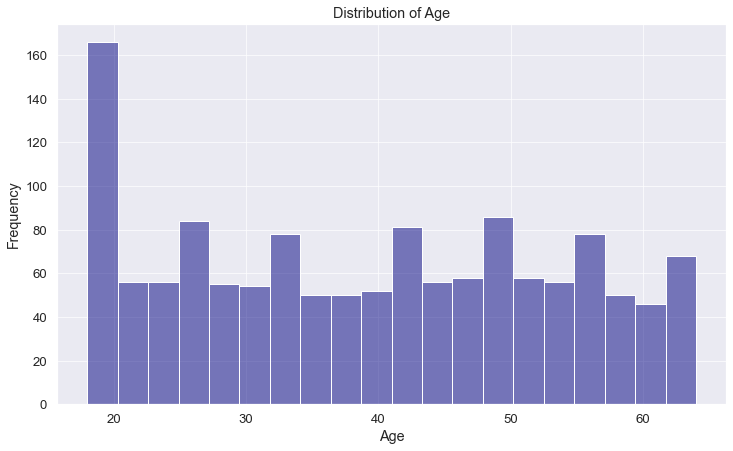

EDA for Age: 
 
count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64 



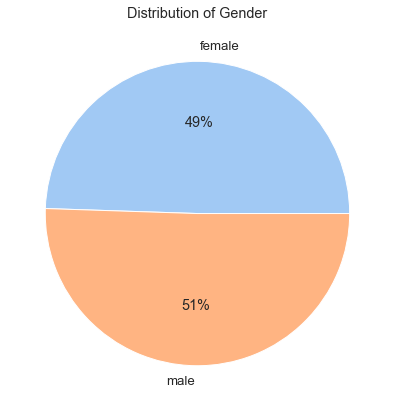

EDA for Gender: 
 
count     1338
unique       2
top       male
freq       676
Name: gender, dtype: object 



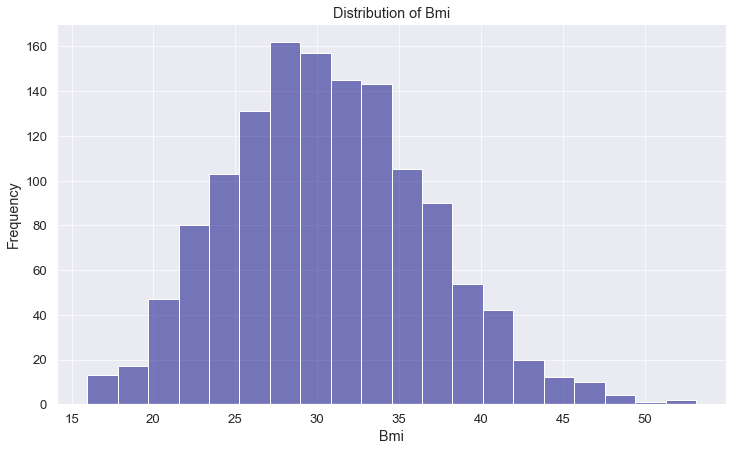

EDA for Bmi: 
 
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64 



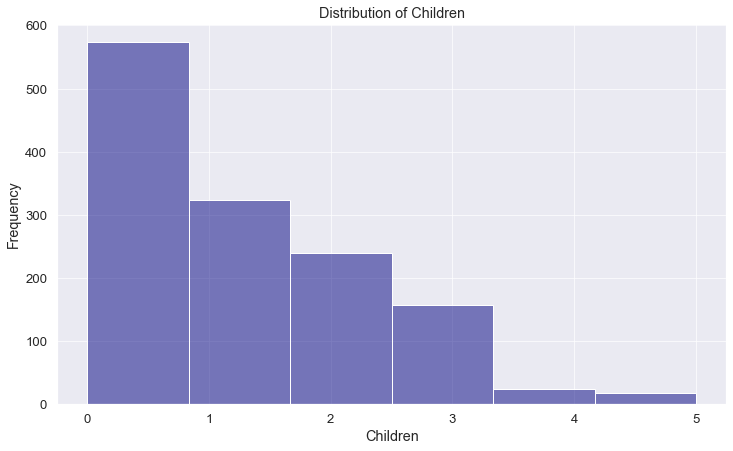

EDA for Children: 
 
count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64 



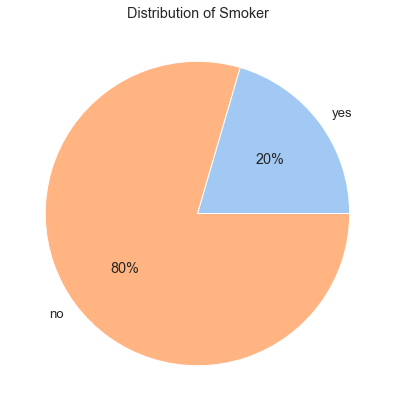

EDA for Smoker: 
 
count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object 



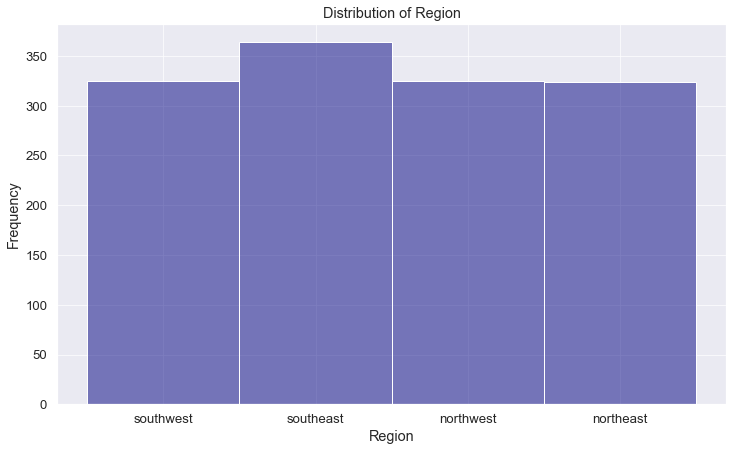

EDA for Region: 
 
count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object 



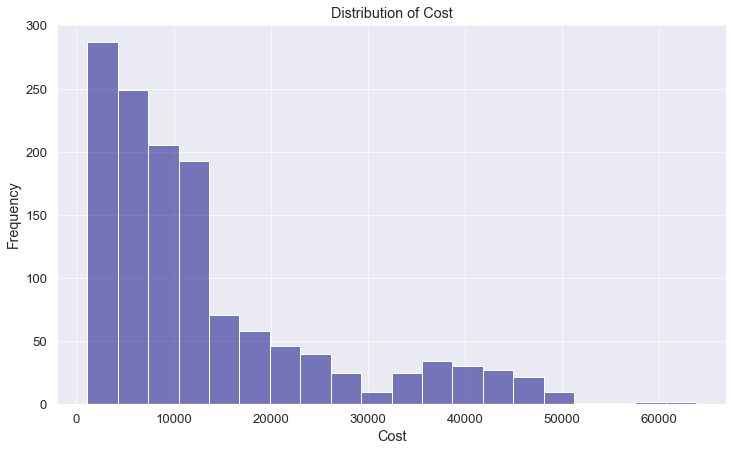

EDA for Cost: 
 
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: cost, dtype: float64 



In [4]:
for column in columns:
    if column == "gender" or column == "smoker":
        labels = insurance_df[column].unique()
        data = [insurance_df[column][insurance_df[column] == label].count() for label in labels] 
        ## Count the number of specific label in the column.
        
        colors = sns.color_palette('pastel')[0:insurance_df[column].nunique()]
        
        plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
        plt.title(f"Distribution of {column.title()}")
        plt.show()
        print(f"EDA for {column.title()}: \n", f"\n{insurance_df[column].describe()} \n")
    
    else:
        bins = lambda column: 20 if insurance_df[column].nunique() > 20 else insurance_df[column].nunique()
        ## Set the bin number to 20 if there are more than 20 unique values in the column.
        ## Otherwise set the bin number to equal the number of unique values in the column.
        
        sns.histplot(insurance_df[column], 
                     bins = bins(column), 
                     color = "navy",
                     alpha = 0.5)
        plt.grid(alpha = 0.7)
        plt.xlabel(f"{column.title()}")
        plt.ylabel("Frequency")
        plt.title(f"Distribution of {column.title()}")
        plt.show()
        print(f"EDA for {column.title()}: \n", f"\n{insurance_df[column].describe()} \n")



There are 7 columns in total: age, gender, BMI, children, smoker, region, and cost.

There are 1338 observations in total for this particular dataset.

Here is a statistical summary for each column:
- Age (years): 
    * Mean: 39.2
    * Median: 39.2
    * Standard Deviation: 14.05
    * Range: 18.0 (min) ~ 64.0 (max), interquartile: 27.0 ~ 51.0

- Gender (male/female): 
    * Male: 676
    * Female: 662

- BMI (no units): 
    * Mean: 30.7
    * Median: 30.4
    * Standard Deviation: 6.1
    * Range: 15.96 (min) ~ 53.13 (max), interquartile: 26.30 ~ 34.69

- Children (number of children): 
    * Mean: 1.09
    * Median: 1.0
    * Standard Deviation: 1.21
    * Range: 0.0 (min) ~ 5.0 (max), interquartile: 0.0 ~ 2.0

- Smoker (yes/no): 
    * Yes: 274
    * No: 1064

- Region (NorthEast/NorthWest/SouthEast/SouthWest): 
    * The largest region represented in the sample: SouthEast (364)
    * The regions are evenly distributed.

- Cost (USD): 
    * Mean: 13270.42
    * Median: 9382.03
    * Standard Deviation: 12110.01
    * Range: 1121.87 (min) ~ 63770.43 (max), interquartile: 4740.29 ~ 16639.91

Few notes:
- The sample is biased towards non-smokers, and to lesser extent, the number of children (there are more observations with the number of children less than 2 than those with 2 or more children).
- There is a high number of under 20s in the sample, but this issue may be resolved when the age groups are grouped appropriately.
- There is a large variance in insurance cost, and the average cost is likely to be affected by the outliers. It is probably better to use the median values to analyse the data rather than the mean.


#### The key questions we will address in this project are:
- Analysis of data based on most relevant variables with respect to insurance cost.
- Prediction model of insurance cost for any individual given their profile (not yet complete).

## Data Analysis

### 1. Add new columns - "Age Group" and "BMI Group"

In [5]:
# Group the data according to their age groups

df = insurance_df.copy()

age_group = ["Under 20", "20-29", "30-39", "40-49", "50-59", "Over 60"] #Reference age group list

df['age_group'] = pd.cut(x=df['age'], bins=[1, 20, 30, 40, 50, 60, 100],
                    labels=age_group)

df.age_group = pd.Categorical(df.age_group, categories = age_group, ordered=True)


# Group the data according to their BMI

# BMI is categorised as "Underweight": <18.5, "Healthy": 24.9, "Overweight": 29.9, "Obese": >30.
bmi_group = ["Underweight", "Healthy", "Overweight", "Obese"]
                
df['bmi_group'] = pd.cut(x=df['bmi'], bins=[1, 18.6, 25, 30, 100],
                    labels=bmi_group)
                
df.bmi_group = pd.Categorical(df.bmi_group, categories = bmi_group, ordered=True)

children_group = [0, 1, 2, 3, 4, 5]

## Assign numerical values to categorical values in new columns (Gender, Smoker, Regions)

### Change columns to categorical
df.gender = pd.Categorical(df.gender, categories = ["male", "female"], ordered=False) 
df.smoker = pd.Categorical(df.smoker, categories = ["yes", "no"], ordered=False)
df.region = pd.Categorical(df.region, categories = ["northeast", "northwest", "southeast", "southwest"], ordered=False)

df["gender_num"] = df.gender.cat.codes ## Label encoding - male = 0, female = 1
df["smoker_num"] = df.smoker.cat.codes ## Label encoding - yes = 0, no = 1
df["region_num"] = df.region.cat.codes ## Label encoding - northeast = 0, northwest = 1, southeast = 2, southwest = 3

## Find correlation between variables
df.corr()


,age,bmi,children,cost,gender_num,smoker_num,region_num
age,1.000000,0.109272,0.042469,0.299008,0.020856,0.025019,0.002127
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,-0.003750,0.157566
children,0.042469,0.012759,1.000000,0.067998,-0.017163,-0.007673,0.016569
cost,0.299008,0.198341,0.067998,1.000000,-0.057292,-0.787251,-0.006208
gender_num,0.020856,-0.046371,-0.017163,-0.057292,1.000000,0.076185,-0.004588
smoker_num,0.025019,-0.003750,-0.007673,-0.787251,0.076185,1.000000,0.002181
region_num,0.002127,0.157566,0.016569,-0.006208,-0.004588,0.002181,1.000000


There is a strong negative correlation between smoking and cost, indicating that smokers are paying higher insurance cost than non-smokers. There is also a moderate positive correlation between age and cost, and bmi and cost. Other variables are weakly correlated with cost.

Other than cost, there is almost no correlation between the variables, except between age and BMI where there is a weak positive correlation.

So this allows us to focus our analysis on age, bmi, and smoking status as key variables.
I will also add gender and the number of children as part of the exercise.

### Define Distribution Function

In [6]:
# This function creates sub-datasets based on the values of the target column, and calculates the distribution
# of the groups in the group list.
# For example, calculate the distribution of age_group and bmi_group (groups in group_list) based on gender (target).

def distribution(df, target, group_list):
    gender = ["male", "female"]
    smoker = ["yes", "no"]
    region = ["northeast", "northwest", "southeast", "southwest"]
    
    user_input = input("Print distribution information in a table format? (y/n): ")
    ## Ask for user input whether to print out information on distribution of groups in the dataset.
    
    if target == "gender":
        target_cat = gender
    elif target == "smoker":
        target_cat = smoker
    elif target == "bmi_group":
        target_cat = bmi_group
    elif target == "age_group":
        target_cat = age_group
    else:
        target_cat = region
        
    df_group = df.copy()
    
    if target == "gender" or target == "smoker":
        ## Create subsets based on the target column values - e.g. Create male_df and female_df for gender column.
        group1_df = df_group[df_group[target] == target_cat[0]]
        group2_df = df_group[df_group[target] == target_cat[1]]
        
        for group in group_list:
            group1_count = group1_df.groupby(group)[group].count()
            group2_count = group2_df.groupby(group)[group].count()
            
            group1_pc = np.array(group1_count) / num_samples * 100
            group2_pc = np.array(group2_count) / num_samples * 100     
            
            if user_input == "y":
    
                if group == "age_group":
                    print(f"The age group for {target_cat[0]} are distributed as follows: \n")
                    print(tabulate(zip(age_group, group1_count, np.round(group1_pc,2)), 
                                   headers = [f"Age Group", "Count", "% Total"]))
    
                    print(f"\nThe age groups for {target_cat[1]} are distributed as follows: \n")
                    print(tabulate(zip(age_group, group2_count, np.round(group2_pc,2)), 
                                   headers = ["Age Group", "Count", "% Total"]))
    
                elif group == "bmi_group":       
                    print(f"\nThe BMI groups for {target_cat[0]} are distributed as follows: \n")
                    print(tabulate(zip(bmi_group, group1_count, np.round(group1_pc,2)), 
                                   headers = ["BMI Group", "Count", "% Total"]))
    
                    print(f"\nThe BMI groups for {target_cat[1]} are distributed as follows: \n")
                    print(tabulate(zip(bmi_group, group2_count, np.round(group2_pc,2)), 
                                   headers = ["BMI Group", "Count", "% Total"]))

                elif group == "gender":       
                    print(f"\nThe gender groups for {target_cat[0]} are distributed as follows: \n")
                    print(tabulate(zip(gender, group1_count, np.round(group1_pc,2)), 
                                   headers = ["Gender Group", "Count", "% Total"]))

                    print(f"\nThe gender groups for {target_cat[1]} are distributed as follows: \n")
                    print(tabulate(zip(gender, group2_count, np.round(group2_pc,2)), 
                                   headers = ["Gender Group", "Count", "% Total"]))
                
                elif group == "smoker":       
                    print(f"\nThe smoker groups for {target_cat[0]} are distributed as follows: \n")
                    print(tabulate(zip(smoker, group1_count, np.round(group1_pc,2)), 
                                   headers = ["Smoker Group", "Count", "% Total"]))

                    print(f"\nThe smoker groups for {target_cat[1]} are distributed as follows: \n")
                    print(tabulate(zip(smoker, group2_count, np.round(group2_pc,2)), 
                                   headers = ["Smoker Group", "Count", "% Total"]))

                else:
                    print(f"\nThe number of children for {target_cat[0]} are distributed as follows: \n")
                    print(tabulate(zip(children_group, group1_count, np.round(group1_pc,2)), 
                                   headers = ["No of Children", "Count", "% Total"]))
    
                    print(f"\nThe number of children for {target_cat[1]} are distributed as follows: \n")
                    print(tabulate(zip(children_group, group2_count, np.round(group2_pc,2)), 
                                   headers = ["No of Children", "Count", "% Total"]))
            
            else: pass
        
        return df_group, group1_df, group2_df
  
    else:
        group1_df = df_group[df_group[target] == target_cat[0]]
        group2_df = df_group[df_group[target] == target_cat[1]]
        group3_df = df_group[df_group[target] == target_cat[2]]
        group4_df = df_group[df_group[target] == target_cat[3]]
        
        for group in group_list:
            group1_count = group1_df.groupby(group)[group].count()
            group2_count = group2_df.groupby(group)[group].count()
            group3_count = group3_df.groupby(group)[group].count()
            group4_count = group4_df.groupby(group)[group].count()
            
            group1_pc = np.array(group1_count) / num_samples * 100
            group2_pc = np.array(group2_count) / num_samples * 100 
            group3_pc = np.array(group3_count) / num_samples * 100
            group4_pc = np.array(group4_count) / num_samples * 100 
            
            if user_input == "y":
    
                if group == "age_group":
                    print(f"The age group for {target_cat[0]} are distributed as follows: \n")
                    print(tabulate(zip(age_group, group1_count, np.round(group1_pc,2)), 
                                   headers = [f"Age Group", "Count", "% Total"]))
    
                    print(f"\nThe age groups for {target_cat[1]} are distributed as follows: \n")
                    print(tabulate(zip(age_group, group2_count, np.round(group2_pc,2)), 
                                   headers = ["Age Group", "Count", "% Total"]))
    
                    print(f"\nThe age groups for {target_cat[2]} are distributed as follows: \n")
                    print(tabulate(zip(age_group, group3_count, np.round(group3_pc,2)), 
                                   headers = ["Age Group", "Count", "% Total"]))
            
                    print(f"\nThe age groups for {target_cat[3]} are distributed as follows: \n")
                    print(tabulate(zip(age_group, group4_count, np.round(group4_pc,2)), 
                                   headers = ["Age Group", "Count", "% Total"]))
                    
                elif group == "bmi_group":       
                    print(f"\nThe BMI groups for {target_cat[0]} are distributed as follows: \n")
                    print(tabulate(zip(bmi_group, group1_count, np.round(group1_pc,2)), 
                                   headers = ["BMI Group", "Count", "% Total"]))
    
                    print(f"\nThe BMI groups for {target_cat[1]} are distributed as follows: \n")
                    print(tabulate(zip(bmi_group, group2_count, np.round(group2_pc,2)), 
                                   headers = ["BMI Group", "Count", "% Total"]))
            
                    print(f"\nThe BMI groups for {target_cat[2]} are distributed as follows: \n")
                    print(tabulate(zip(bmi_group, group3_count, np.round(group3_pc,2)), 
                                   headers = ["BMI Group", "Count", "% Total"]))
                    
                    print(f"\nThe BMI groups for {target_cat[3]} are distributed as follows: \n")
                    print(tabulate(zip(bmi_group, group4_count, np.round(group4_pc,2)), 
                                   headers = ["BMI Group", "Count", "% Total"]))

                elif group == "gender":       
                    print(f"\nThe gender groups for {target_cat[0]} are distributed as follows: \n")
                    print(tabulate(zip(gender, group1_count, np.round(group1_pc,2)), 
                                   headers = ["Gender Group", "Count", "% Total"]))

                    print(f"\nThe gender groups for {target_cat[1]} are distributed as follows: \n")
                    print(tabulate(zip(gender, group2_count, np.round(group2_pc,2)), 
                                   headers = ["Gender Group", "Count", "% Total"]))
                    
                    print(f"\nThe gender groups for {target_cat[2]} are distributed as follows: \n")
                    print(tabulate(zip(gender, group3_count, np.round(group3_pc,2)), 
                                   headers = ["Gender Group", "Count", "% Total"]))
                    
                    print(f"\nThe gender groups for {target_cat[3]} are distributed as follows: \n")
                    print(tabulate(zip(gender, group4_count, np.round(group4_pc,2)), 
                                   headers = ["Gender Group", "Count", "% Total"]))

                                    
                elif group == "smoker":       
                    print(f"\nThe smoker groups for {target_cat[0]} are distributed as follows: \n")
                    print(tabulate(zip(smoker, group1_count, np.round(group1_pc,2)), 
                                   headers = ["Smoker Group", "Count", "% Total"]))

                    print(f"\nThe smoker groups for {target_cat[1]} are distributed as follows: \n")
                    print(tabulate(zip(smoker, group2_count, np.round(group2_pc,2)), 
                                   headers = ["Smoker Group", "Count", "% Total"]))
                    
                    print(f"\nThe smoker groups for {target_cat[2]} are distributed as follows: \n")
                    print(tabulate(zip(smoker, group1_count, np.round(group1_pc,2)), 
                                   headers = ["Smoker Group", "Count", "% Total"]))

                    print(f"\nThe smoker groups for {target_cat[3]} are distributed as follows: \n")
                    print(tabulate(zip(smoker, group2_count, np.round(group2_pc,2)), 
                                   headers = ["Smoker Group", "Count", "% Total"]))
                    
                else:
                    print(f"\nThe number of children for {target_cat[0]} are distributed as follows: \n")
                    print(tabulate(zip(children_group, group1_count, np.round(group1_pc,2)), 
                                   headers = ["No of Children", "Count", "% Total"]))
    
                    print(f"\nThe number of children for {target_cat[1]} are distributed as follows: \n")
                    print(tabulate(zip(children_group, group2_count, np.round(group2_pc,2)), 
                                   headers = ["No of Children", "Count", "% Total"]))
            
                    print(f"\nThe number of children for {target_cat[2]} are distributed as follows: \n")
                    print(tabulate(zip(children_group, group3_count, np.round(group3_pc,2)), 
                                   headers = ["No of Children", "Count", "% Total"]))
                    
                    print(f"\nThe number of children for {target_cat[3]} are distributed as follows: \n")
                    print(tabulate(zip(children_group, group4_count, np.round(group2_pc,2)), 
                                   headers = ["No of Children", "Count", "% Total"]))
            
            else: pass

        return df_group, group1_df, group2_df, group3_df, group4_df


### Define calc_median function

In [7]:
# This function calculates the median insurance cost for groups in the group list based on the target column.
# For example, calculate the median insurance cost for different age groups and bmi groups (groups in the group_list)
# based on gender (target).

def calc_median(group1_df, group2_df, target, group_list, group3_df = None, group4_df = None):
    gender = ["male", "female"]
    smoker = ["yes", "no"]
    region = ["northeast", "northwest", "southeast", "southwest"]
    
    if target == "gender":
        target_cat = gender
    elif target == "smoker":
        target_cat = smoker
    elif target == "bmi_group":
        target_cat = bmi_group
    elif target == "age_group":
        target_cat = age_group
    else:
        target_cat = region
        
    for group in group_list: 
        
        df_grouped1 = group1_df.groupby(group) # Group by selected group
        df_grouped2 = group2_df.groupby(group)
        
        if group3_df is not None and group4_df is not None:
            df_grouped3 = group3_df.groupby(group)
            df_grouped4 = group4_df.groupby(group)
        
        medians_group1 = df_grouped1.cost.median()
        medians_group2 = df_grouped2.cost.median()
        
        if group3_df is not None and group4_df is not None:
            medians_group3 = df_grouped3.cost.median()
            medians_group4 = df_grouped4.cost.median()
        
        if target == "gender" or target == "smoker":
            cost_diff = np.array(medians_group1) - np.array(medians_group2)  
        
            if group == "age_group":
                print(f"The median insurance cost for each age group: \n:")
                print(tabulate(zip(age_group, medians_group1, medians_group2, np.round(cost_diff, 2)), 
                                   headers = ["Age Group", f"Cost ($) - {target_cat[0]}", 
                                              f"Cost ($) - {target_cat[1]}", "Cost Diff"],
                               tablefmt = 'grid'))

            elif group == "bmi_group":
                print(f"The median insurance cost for each BMI group: \n:")
                print(tabulate(zip(bmi_group, medians_group1, medians_group2, np.round(cost_diff, 2)), 
                                   headers = [f"BMI Group", f"Cost ($) - {target_cat[0]}", 
                                              f"Cost ($) - {target_cat[1]}", "Cost Diff"],
                               tablefmt = 'grid')) 

            elif group == "gender":
                print(f"The median insurance cost for each gender group: \n:")
                print(tabulate(zip(gender, medians_group1, medians_group2, np.round(cost_diff, 2)), 
                                   headers = [f"Gender Group", f"Cost ($) - {target_cat[0]}", 
                                              f"Cost ($) - {target_cat[1]}", "Cost Diff"],
                               tablefmt = 'grid'))
                
            else:
                print(f"The median insurance cost for each number of children: \n:")
                print(tabulate(zip(children_group, medians_group1, medians_group2, np.round(cost_diff, 2)), 
                                   headers = [f"Children Group", f"Cost ($) - {target_cat[0]}", 
                                              f"Cost ($) - {target_cat[1]}", "Cost Diff"],
                               tablefmt = 'grid'))
        
        else:
            if group == "age_group":
                print(f"The median insurance cost for each age group: \n:")
                print(tabulate(zip(age_group, medians_group1, medians_group2, medians_group3, medians_group4), 
                                   headers = ["Age Group", 
                                              f"Cost ($) - {target_cat[0]}", 
                                              f"Cost ($) - {target_cat[1]}", 
                                              f"Cost ($) - {target_cat[2]}",
                                              f"Cost ($) - {target_cat[3]}",],
                               tablefmt = 'grid'))

            elif group == "bmi_group":
                print(f"The median insurance cost for each BMI group: \n:")
                print(tabulate(zip(bmi_group, medians_group1, medians_group2, medians_group3, medians_group4), 
                                   headers = ["BMI Group", 
                                              f"Cost ($) - {target_cat[0]}", 
                                              f"Cost ($) - {target_cat[1]}", 
                                              f"Cost ($) - {target_cat[2]}",
                                              f"Cost ($) - {target_cat[3]}",],
                               tablefmt = 'grid')) 

            elif group == "gender":
                print(f"The median insurance cost for each gender group: \n:")
                print(tabulate(zip(gender, medians_group1, medians_group2, medians_group3, medians_group4), 
                                   headers = ["Gender Group", 
                                              f"Cost ($) - {target_cat[0]}", 
                                              f"Cost ($) - {target_cat[1]}", 
                                              f"Cost ($) - {target_cat[2]}",
                                              f"Cost ($) - {target_cat[3]}",],
                               tablefmt = 'grid'))
                
            else:
                print(f"The median insurance cost for each number of children: \n:")
                print(tabulate(zip(children_group, medians_group1, medians_group2, medians_group3, medians_group4), 
                                   headers = ["Age Group", 
                                              f"Cost ($) - {target_cat[0]}", 
                                              f"Cost ($) - {target_cat[1]}", 
                                              f"Cost ($) - {target_cat[2]}",
                                              f"Cost ($) - {target_cat[3]}",],
                               tablefmt = 'grid'))
    
    return None
            

### 2. Data Analysis based on Age

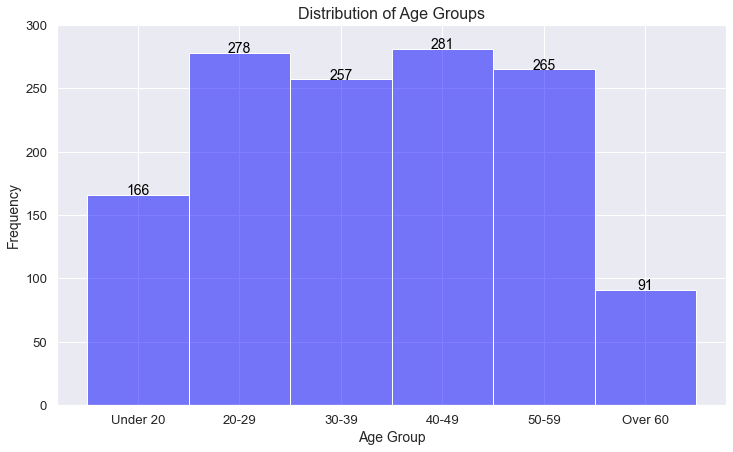

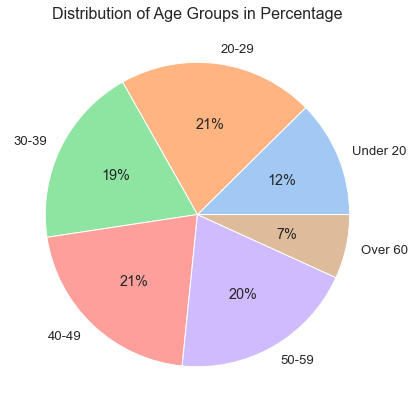


There are 1081 individuals aged between 20-60, 
which accounts for 80.79% of the total sample.



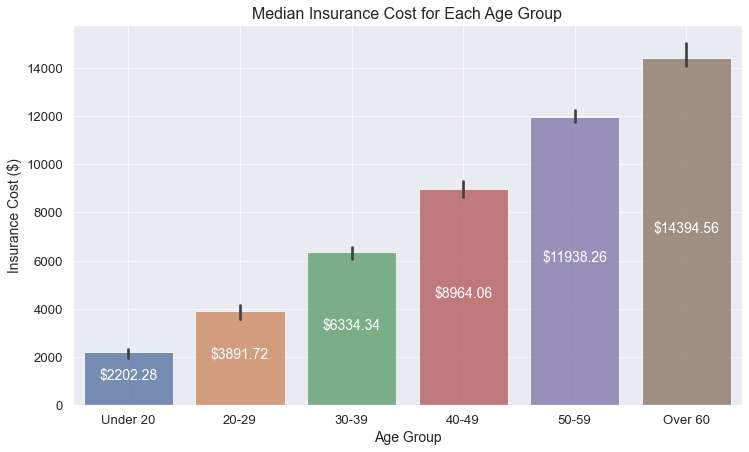

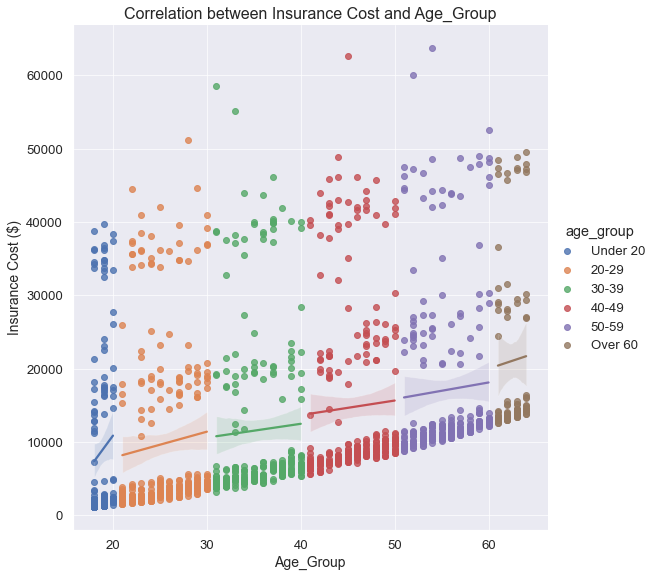

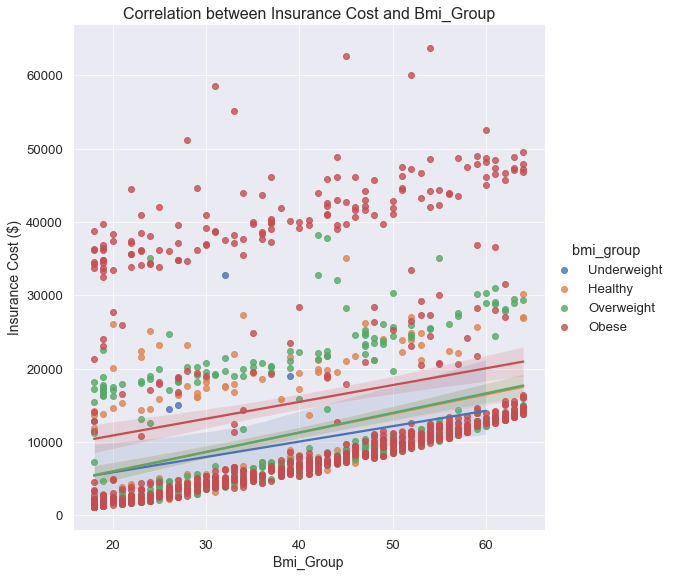

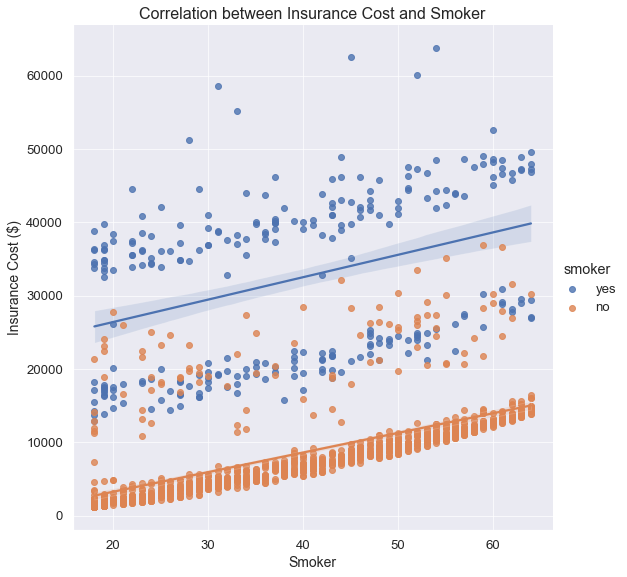

In [8]:
df_age = df.copy() # Make a copy of the original dataframe for use in this analysis.

# Plot histogram of age groups

counts = [df_age.age_group[df_age.age_group == group].count() for group in age_group]

max_freq = np.max(df_age.age_group.value_counts())

sns.histplot(data = df_age.age_group,
             color = 'blue',
             alpha = 0.5)
plt.xlabel("Age Group", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.title(f"Distribution of Age Groups", fontsize = 16)
plt.ylim(0, np.ceil(max_freq/100) * 100 if max_freq%50 else max_freq + 50)

for i in range(len(counts)):
    plt.annotate(counts[i], 
                 xy = [i, counts[i]], 
                 horizontalalignment = 'center',
                 color = 'black',
                 fontsize = 14)
    
plt.show()


# Distribution of age groups shown as a pie graph.

colors = sns.color_palette('pastel')[0:df_age.age_group.nunique()]

plt.pie(counts, labels = age_group, colors = colors, autopct='%.0f%%')
plt.title("Distribution of Age Groups in Percentage", fontsize = 16)
plt.show()

df_age_group = df_age.groupby("age_group") # Group by age group

## Calculate the number of people aged between 20 and 60
num_age_2060 = (len(df_age_group.get_group("20-29"))
                + len(df_age_group.get_group("30-39")) 
                + len(df_age_group.get_group("40-49")) 
                + len(df_age_group.get_group("50-59")))

pop_2060 = num_age_2060 / num_samples * 100

print(f"""\nThere are {num_age_2060} individuals aged between 20-60, 
which accounts for {round(pop_2060, 2)}% of the total sample.\n""")


# Median insurance cost for each age group
medians = df_age_group.cost.median()

sns.barplot(x = "age_group", y = "cost", data = df_age,
            palette = 'deep', alpha = 0.8,
            estimator = np.median)
plt.grid(alpha = 0.7)
plt.xlabel("Age Group", fontsize = 14)
plt.ylabel("Insurance Cost ($)", fontsize = 14)
plt.title("Median Insurance Cost for Each Age Group", fontsize = 16)

for i in range(len(medians)):
    plt.annotate(f"${round(medians[i], 2)}", 
                 xy = [i, medians[i]/2], 
                 horizontalalignment = 'center',
                 color = 'white',
                 fontsize = 14)

plt.show()

# Correlation between age and insurance cost for different groups - age_group, bmi_group, smoker

for group in ["age_group", "bmi_group", "smoker"]:
    sns.lmplot(x="age", y="cost", 
               data = df_age,
               height = 8,
               hue = group,
               fit_reg = True) 
    plt.grid(alpha = 0.7)
    plt.xlabel(f"{group.title()}", fontsize = 14)
    plt.ylabel("Insurance Cost ($)", fontsize = 14)
    plt.title(f"Correlation between Insurance Cost and {group.title()}", fontsize = 16)
    plt.show()



After grouping the individuals according to their age groups, we see that the most of the individuals in the sample are aged between 20 and 60, which is around 81% of the total sample.

The age groups within the ages of 20 and 60 are evenly distributed, at around 20% each.

The median insurance cost for 60+ group is the highest at $14394.56.

The lowest median insurance cost is $2202.28 for Under 20 group.

The scatter plots for age versus insurance cost show that insurance cost increases linearly with age, with a large number of outliers far exceeding the median insurance cost for each age. There are also many outliers for each group indicating that there are other factors affecting the insurance cost other than age. 

Grouping the datapoints based on BMI and smoking staus shows that most of the outliers are due to smoking (all data points associated with smoking are found in the outliers), and the BMI. While most of the outliers are classed as Obese in the BMI group, there are still a large portion of datapoints in the IQR that are also classified as Obese, which suggests that BMI does not play a strong a role as smoking. Therefore, a conventional assumption that obesity is a major health risk factor and therefore will heavily influence on the insurance cost is only half true - smoking is a bigger risk than obesity and it is possible that your insurance cost may be low even if you are obese.


Print distribution information in a table format? (y/n): y
The age group for Underweight are distributed as follows: 

Age Group      Count    % Total
-----------  -------  ---------
Under 20           5       0.37
20-29              7       0.52
30-39              6       0.45
40-49              0       0
50-59              4       0.3
Over 60            0       0

The age groups for Healthy are distributed as follows: 

Age Group      Count    % Total
-----------  -------  ---------
Under 20          31       2.32
20-29             61       4.56
30-39             42       3.14
40-49             42       3.14
50-59             38       2.84
Over 60           11       0.82

The age groups for Overweight are distributed as follows: 

Age Group      Count    % Total
-----------  -------  ---------
Under 20          43       3.21
20-29             80       5.98
30-39             88       6.58
40-49             91       6.8
50-59             67       5.01
Over 60           17       1.27

T

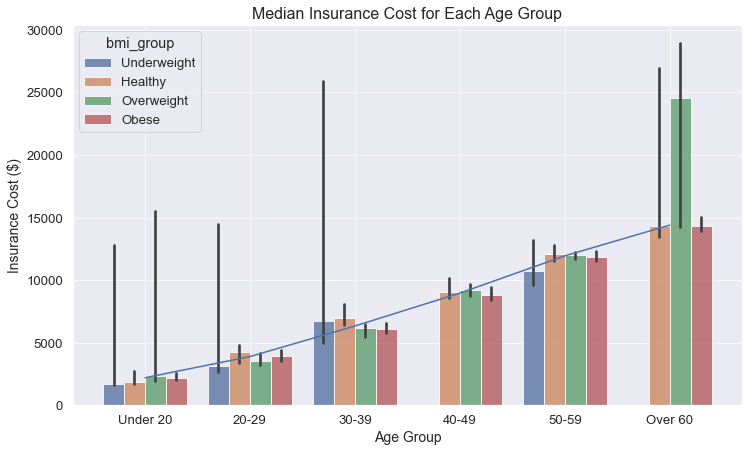

Note: The blue line shows the median insurance cost for each age group.


In [9]:
## Call distribution function to divide the dataframe according to BMI groups. 
## The group we will analyse is the age group.
df_age_bmi, df_age_bmi1, df_age_bmi2, df_age_bmi3, df_age_bmi4 = distribution(df, "bmi_group", ["age_group"])

## Call calc_median function to calculate the median insurance cost for different age groups based on BMI. 
calc_median(group1_df = df_age_bmi1, 
            group2_df = df_age_bmi2, 
            group3_df = df_age_bmi3, 
            group4_df = df_age_bmi4, 
            target = "bmi_group", 
            group_list = ["age_group"])

sns.barplot(x = "age_group", y = "cost", data = df_age_bmi,
            palette = 'deep', alpha = 0.8,
            hue = "bmi_group",
            estimator = np.median)

plt.plot(age_group, medians)
plt.grid(alpha = 0.7)
plt.xlabel("Age Group", fontsize = 14)
plt.ylabel("Insurance Cost ($)", fontsize = 14)
plt.title("Median Insurance Cost for Each Age Group", fontsize = 16)

plt.show()

print(f"Note: The blue line shows the median insurance cost for each age group.")

Analysis:

- There are very small number of underweight individuals regardless of their age.
- There are more overweight and obese people than healthy people.
- Most of the healthy-weight people are aged between 20 and 29. Most of the obese people are aged between 50 - 59.
- There is not a significant difference in median insurance cost between different BMI groups when they are further sub-grouped by their age. One outlier is the overweight group aged over 60.
- The variance of the cost is especially high in underweight group, possibly due to the influence of smoking on the insurance cost.

### 3. Data Analysis based on Gender

Print distribution information in a table format? (y/n): y
The age group for male are distributed as follows: 

Age Group      Count    % Total
-----------  -------  ---------
Under 20          86       6.43
20-29            144      10.76
30-39            130       9.72
40-49            141      10.54
50-59            131       9.79
Over 60           44       3.29

The age groups for female are distributed as follows: 

Age Group      Count    % Total
-----------  -------  ---------
Under 20          80       5.98
20-29            134      10.01
30-39            127       9.49
40-49            140      10.46
50-59            134      10.01
Over 60           47       3.51

The BMI groups for male are distributed as follows: 

BMI Group      Count    % Total
-----------  -------  ---------
Underweight        8       0.6
Healthy          108       8.07
Overweight       189      14.13
Obese            371      27.73

The BMI groups for female are distributed as follows: 

BMI Group      C

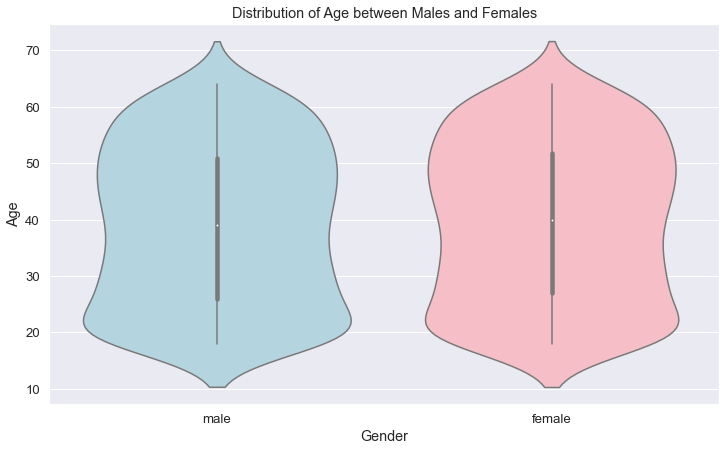

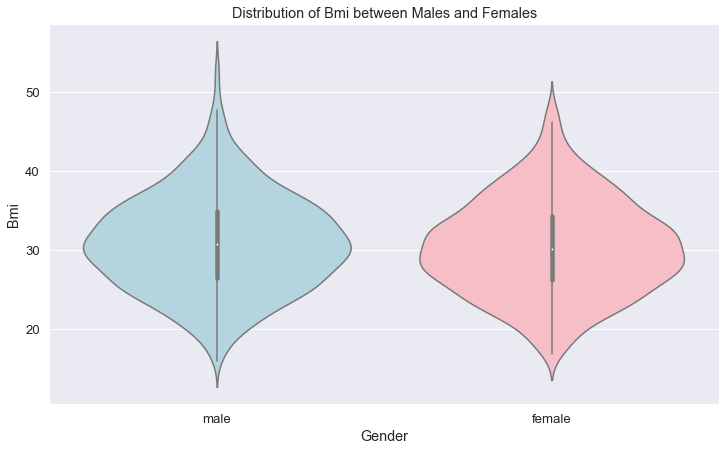

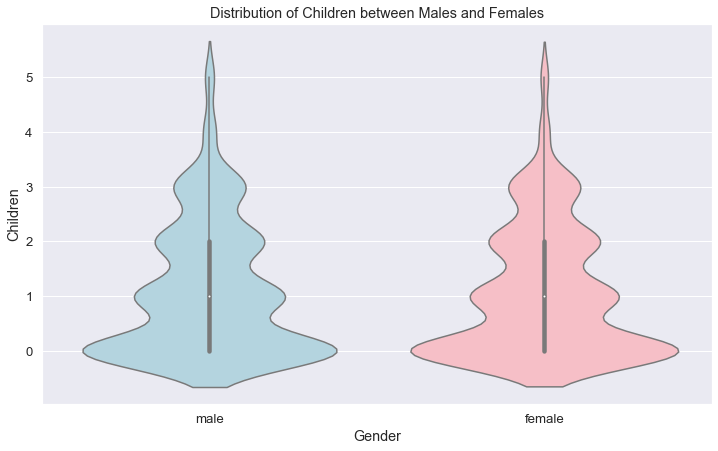

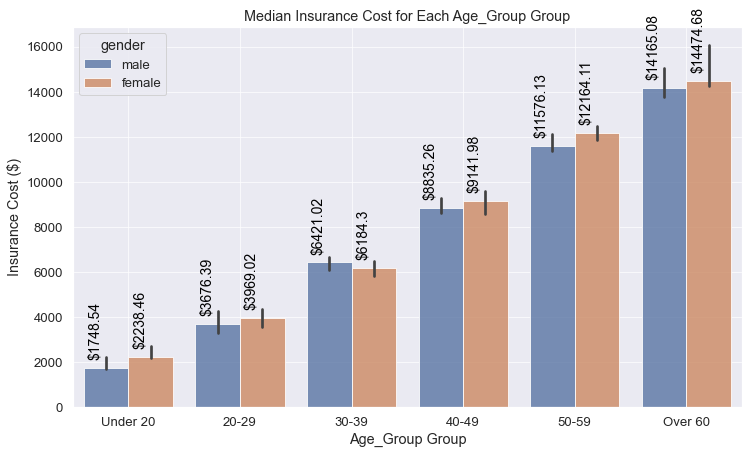

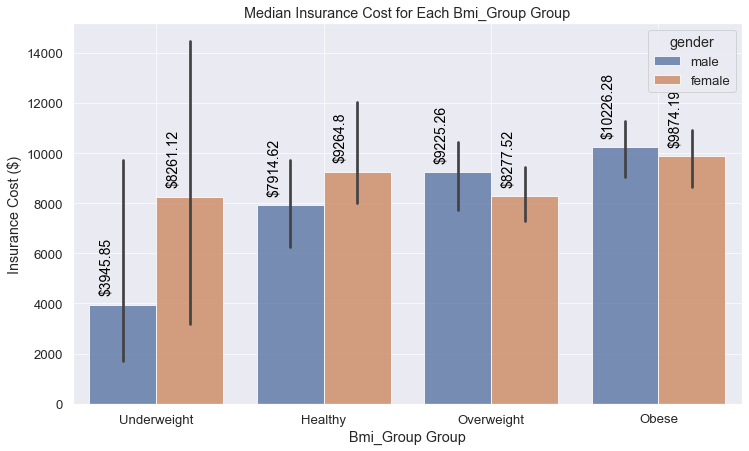

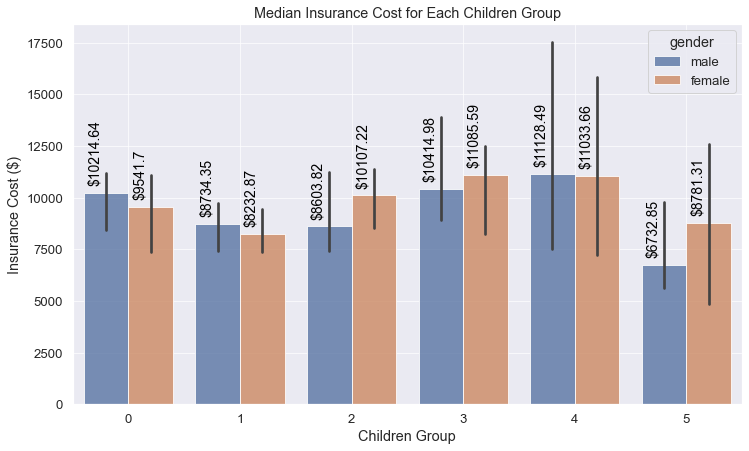

The median insurance cost for each age group: 
:
+-------------+-------------------+---------------------+-------------+
| Age Group   |   Cost ($) - male |   Cost ($) - female |   Cost Diff |
+=============+===================+=====================+=============+
| Under 20    |           1748.54 |             2238.46 |     -489.92 |
+-------------+-------------------+---------------------+-------------+
| 20-29       |           3676.39 |             3969.02 |     -292.64 |
+-------------+-------------------+---------------------+-------------+
| 30-39       |           6421.02 |             6184.3  |      236.72 |
+-------------+-------------------+---------------------+-------------+
| 40-49       |           8835.26 |             9141.98 |     -306.72 |
+-------------+-------------------+---------------------+-------------+
| 50-59       |          11576.1  |            12164.1  |     -587.98 |
+-------------+-------------------+---------------------+-------------+
| Over 60     |

In [10]:
# Call distribution function
# Distribution of age, BMI, and number of children grouped by gender

df_gender, male_df, female_df = distribution(df, "gender", ["age_group", "bmi_group", "children"])

df_gender.gender = pd.Categorical(df_gender.gender, categories = ['male', 'female'], ordered=False)


## Plot violin plot

for group in ["age", "bmi", "children"]:
    sns.violinplot(x = "gender", y = group, data=df_gender,
                   palette=["lightblue", "lightpink"],
                   alpha = 0.5,
                   height=20)
    plt.xlabel("Gender")
    plt.ylabel(f"{group.title()}")
    plt.title(f"Distribution of {group.title()} between Males and Females")
    plt.show()
    
        
## Median insurance cost for males and females as a function of age, bmi, and number of children

for group in ["age_group", "bmi_group", "children"]:
    sns.barplot(x = group, y = "cost", hue = 'gender', data = df_gender,
                palette = 'deep', alpha = 0.8,
                estimator = np.median)
    plt.grid(alpha = 0.7)
    plt.xlabel(f"{group.title()} Group")
    plt.ylabel("Insurance Cost ($)")
    plt.title(f"Median Insurance Cost for Each {group.title()} Group")

    male_group = male_df.groupby(group) # Group by selected group
    female_group = female_df.groupby(group) 
    
    medians_male = male_group.cost.median()
    medians_female = female_group.cost.median()
    
    for i in range(len(medians_male)):
        plt.annotate(f"${round(medians_male[i], 2)}", 
                     xy = [i-0.3, medians_male[i]+500], 
                     horizontalalignment = 'center',
                     color = 'black',
                     rotation= 90.0,
                     fontsize = 14)

    for i in range(len(medians_male)):
        plt.annotate(f"${round(medians_female[i], 2)}", 
                     xy = [i+0.1, medians_female[i]+500], 
                     horizontalalignment = 'center',
                     color = 'black',
                     rotation= 90.0,
                     fontsize = 14)          
    
    plt.show()

calc_median(male_df, female_df, "gender", ["age_group", "bmi_group", "children"])
                          

Analysis:

- There are no clear trait (e.g. number of dependent children, BMI, age) differences between male and female groups.
- According to the data, males are slightly more likely to be obese than females. In contrast, females are slightly more likely to be underweight or healthy than males. However, a further hypothetical testing will be needed to confirm this.
- There are no clear patterns indicating any difference in the insurance cost that males and females pay.

### 4. Data Analysis based on Smoking Status

Print distribution information in a table format? (y/n): y
The age group for yes are distributed as follows: 

Age Group      Count    % Total
-----------  -------  ---------
Under 20          39       2.91
20-29             56       4.19
30-39             54       4.04
40-49             61       4.56
50-59             42       3.14
Over 60           22       1.64

The age groups for no are distributed as follows: 

Age Group      Count    % Total
-----------  -------  ---------
Under 20         127       9.49
20-29            222      16.59
30-39            203      15.17
40-49            220      16.44
50-59            223      16.67
Over 60           69       5.16

The BMI groups for yes are distributed as follows: 

BMI Group      Count    % Total
-----------  -------  ---------
Underweight        5       0.37
Healthy           50       3.74
Overweight        75       5.61
Obese            144      10.76

The BMI groups for no are distributed as follows: 

BMI Group      Count    %

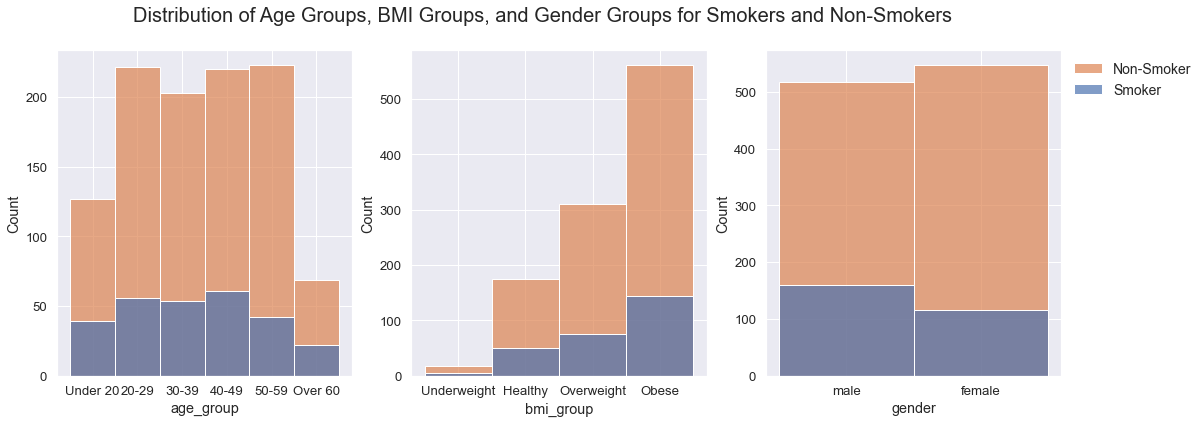

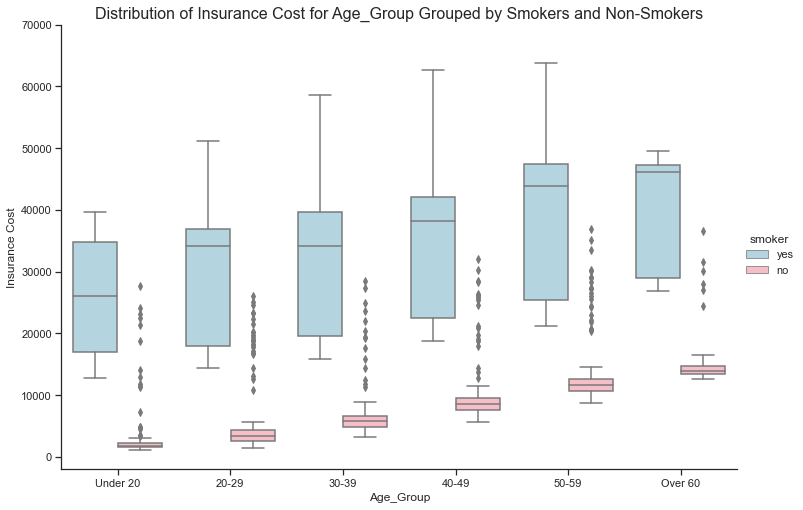

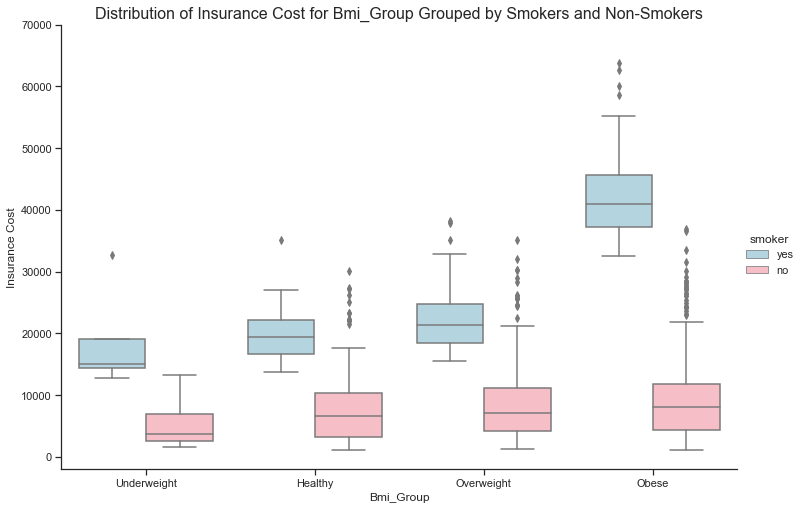

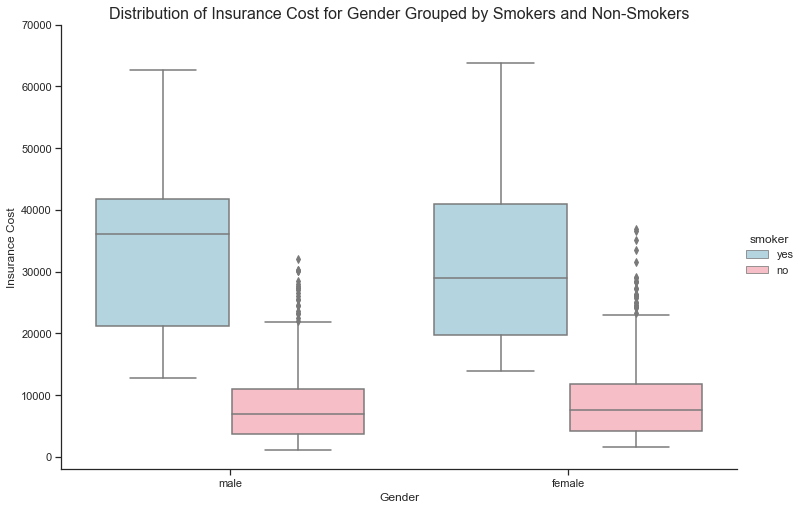

The median insurance cost for each age group: 
:
+-------------+------------------+-----------------+-------------+
| Age Group   |   Cost ($) - yes |   Cost ($) - no |   Cost Diff |
+=============+==================+=================+=============+
| Under 20    |          26125.7 |         1837.24 |     24288.4 |
+-------------+------------------+-----------------+-------------+
| 20-29       |          34210.2 |         3382.15 |     30828   |
+-------------+------------------+-----------------+-------------+
| 30-39       |          34112.9 |         5836.52 |     28276.4 |
+-------------+------------------+-----------------+-------------+
| 40-49       |          38245.6 |         8524.77 |     29720.8 |
+-------------+------------------+-----------------+-------------+
| 50-59       |          43867.5 |        11658.1  |     32209.4 |
+-------------+------------------+-----------------+-------------+
| Over 60     |          46154.7 |        13974.5  |     32180.2 |
+------------

In [11]:
# Group the data according to their smoking status

df_smoker, yes_df, no_df = distribution(df, "smoker", ["age_group", "bmi_group", "gender"])

df_smoker.smoker = pd.Categorical(df_smoker.smoker, categories = ['yes', 'no'], ordered=False)


## Plot histogram for distribution of age, bmi and gender groups for smokers and non-smokers

y_values = ["age_group", "bmi_group", "gender"]
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

fig.suptitle('Distribution of Age Groups, BMI Groups, and Gender Groups for Smokers and Non-Smokers',
             fontsize = 20)
for i in range(0, len(y_values)):
    sns.set(font_scale = 1)
    sns.histplot(ax=axes[i],
                 data = df_smoker,
                 x = y_values[i],
                 alpha = .7,
                 hue = 'smoker',
                 legend = False)  

plt.legend(["Non-Smoker", "Smoker"], frameon=False, loc = 2, bbox_to_anchor = (1,1), fontsize=14)
plt.show()
    

## Plot box plot

for group in ["age_group", "bmi_group", "gender"]:
    with sns.axes_style(style='ticks'):
        g = sns.catplot(x = group, y = "cost", 
                        hue = 'smoker', 
                        data=df_smoker, 
                        kind="box", 
                        height=7, aspect=15/10, 
                        palette=["lightblue", "lightpink"])
        g.set_axis_labels(f"{group.title()}", "Insurance Cost")

    plt.xlabel(f"{group.title()}")
    plt.ylabel("Insurance Cost")
    plt.title(f"Distribution of Insurance Cost for {group.title()} Grouped by Smokers and Non-Smokers",
              fontsize = 16)
    maxfreq = df_smoker.cost.max()
    # Set a clean upper y-axis limit.
    plt.ylim(ymax=np.ceil(maxfreq / 10000) * 10000 if maxfreq % 10 else maxfreq + 10000)
    plt.show()


### Median insurance cost for smokers and non-smokers as a function of age, bmi, and gender

calc_median(yes_df, no_df, "smoker", ["age_group", "bmi_group", "gender"])    



Analysis:

- Regardless of age, gender, or BMI, smokers pay a higher median insurance cost than non-smokers.
- Smokers can pay anywhere up to 10 times more than non-smokers.
- There are some outliers in the non-smoker group. These are probably likely due to age and BMI (requires further analysis).

### 6. Profiling of high-insurance cost paying person and low-insurance cost paying person

In [12]:
med_cost = df.cost.median() ## Overall median insurance cost
max_cost = df.cost.max() ## Maximum overall insurance cost
min_cost =  df.cost.min() ## Minimum overall insurance cost

age_med_cost = list(df_age.groupby("age_group").cost.median()) ## Median insurance cost for each age group
age_med_cost_dict = dict(zip(age_group, age_med_cost))


# Divide the dataset according to median insurance cost.
df_over_med = df[df.cost > med_cost]
df_under_med = df[df.cost <= med_cost]

## Distribution of age, bmi and smoker groups based on gender

df_over_med, male_df, female_df = distribution(df_over_med, target = "gender", 
                                             group_list = ["age_group", "bmi_group", "smoker"])



### From the distribution analysis, most of the people that pay more than the overall median insurance cost ($9382) are:
### Over 40, Overweight or Obese, and Non-Smoker (this is likely due to the fact that non-smoking older age groups
### are also included)

over_med_profile_count = len(df[(df.age_group <= "40-49") & (df.bmi_group <= "Overweight") &(df.smoker == "no")])
print(f"""/n
Number of people who fit the profile: 
{over_med_profile_count}, {round(over_med_profile_count/num_samples*100 , 2)}% of the total sample.""")




## Distribution of age, bmi and smoker groups based on gender for those paying less than or equal to the median cost

df_under_med, male_df, female_df = distribution(df_under_med, target = "gender", 
                                             group_list = ["age_group", "bmi_group", "smoker"])




### From the distribution analysis, most of the people that pay less than or equal to the overall median 
### insurance cost ($9382) are:
### Under 40, Overweight or Obese, and Non-Smoker 

under_med_profile_count = len(df[(df.age_group > "40-49") & (df.bmi_group <= "Overweight") &(df.smoker == "no")])
print(f"""\n
Number of people who fit the profile: 
{under_med_profile_count}, {round(under_med_profile_count/num_samples*100 , 2)}% of the total sample.""")



Print distribution information in a table format? (y/n): y
The age group for male are distributed as follows: 

Age Group      Count    % Total
-----------  -------  ---------
Under 20          28       2.09
20-29             43       3.21
30-39             42       3.14
40-49             56       4.19
50-59            124       9.27
Over 60           44       3.29

The age groups for female are distributed as follows: 

Age Group      Count    % Total
-----------  -------  ---------
Under 20          22       1.64
20-29             38       2.84
30-39             26       1.94
40-49             67       5.01
50-59            132       9.87
Over 60           47       3.51

The BMI groups for male are distributed as follows: 

BMI Group      Count    % Total
-----------  -------  ---------
Underweight        2       0.15
Healthy           45       3.36
Overweight        91       6.8
Obese            199      14.87

The BMI groups for female are distributed as follows: 

BMI Group      C

Analysis:

The overall median insurance cost is $9382. 

A typical person paying more than the median cost is likely to be:
 - Over 40
 - Overweight or Obese
 - Non-smoker (this may be due to the imbalance between the number of smokers and non-smokers in the dataset)
There are 392 people who match this profile, which is around 29% of the total sample.

A typical person paying less than the median cost is likely to be:
 - Under 40
 - Overweight or Obese
 - Non-smoker
There are 111 people who match this profile, which is around 8.3% of the total sample.

The person paying the highest insurance cost is:
 - 54 year old female, with BMI of 47.41 (Obese), smoker with no children.

THe person paying the lowest insurance cost is:
 - 18 year old male, with BMI of 23.21 (Healthy), non-smoker with no children.

In [13]:
# Profile of each age group paying the age-adjusted cost (median cost for each age group) and those paying more than
# the age-adjusted cost

temp_dict = {}

for age in age_group:
    temp_df = df[df.age_group == age]
    temp_df, male_df, female_df = distribution(temp_df, 
                                          target = "gender", 
                                          group_list = ["bmi_group", "smoker"])
    temp_age_value = temp_df.age.values
    temp_bmi_value = temp_df.bmi.values
    temp_smoker_value = temp_df.smoker.values
    temp_cost_value = temp_df.cost.values
    
    temp_dict[age] = {"age": temp_age_value, "bmi": temp_bmi_value, "smoker": temp_smoker_value, "cost": temp_cost_value}    
    

Print distribution information in a table format? (y/n): y

The BMI groups for male are distributed as follows: 

BMI Group      Count    % Total
-----------  -------  ---------
Underweight        3       0.22
Healthy           18       1.35
Overweight        23       1.72
Obese             42       3.14

The BMI groups for female are distributed as follows: 

BMI Group      Count    % Total
-----------  -------  ---------
Underweight        2       0.15
Healthy           13       0.97
Overweight        20       1.49
Obese             45       3.36

The smoker groups for male are distributed as follows: 

Smoker Group      Count    % Total
--------------  -------  ---------
yes                  22       1.64
no                   64       4.78

The smoker groups for female are distributed as follows: 

Smoker Group      Count    % Total
--------------  -------  ---------
yes                  17       1.27
no                   63       4.71
Print distribution information in a table forma

In [14]:
for key in age_group:
    temp_df = pd.DataFrame.from_dict(temp_dict[key])
    temp_df = temp_df[temp_df.cost <= age_med_cost_dict[key]]
    no_value = temp_df[temp_df.smoker == "no"].smoker.count()
    yes_value = temp_df[temp_df.smoker == "yes"].smoker.count()

    if no_value > yes_value: smoker_value = "no"
    else: smoker_value = "yes"

    print(f"""
For {key} group: 
Median Age: {temp_df.age.median()}
Median BMI: {round(temp_df.bmi.median(),2)}
Smoker Status: {smoker_value}""")




For Under 20 group: 
Median Age: 19.0
Median BMI: 29.73
Smoker Status: no

For 20-29 group: 
Median Age: 24.0
Median BMI: 29.15
Smoker Status: no

For 30-39 group: 
Median Age: 34.0
Median BMI: 30.03
Smoker Status: no

For 40-49 group: 
Median Age: 44.0
Median BMI: 30.69
Smoker Status: no

For 50-59 group: 
Median Age: 54.0
Median BMI: 31.6
Smoker Status: no

For Over 60 group: 
Median Age: 62.0
Median BMI: 32.89
Smoker Status: no


Analysis:

Here, we define age-adjusted median insurance cost as median insurance cost for each age group.

For each age group, the person paying age-adjusted median insurance cost is likely to be
(based on the median value for each category):
 - Under 20: 19 years old, non-smoker with BMI of 29.73 (Overweight)
 - 20 - 29: 24 years old, non-smoker with BMI of 29.15 (Overweight)
 - 30 - 39: 34 years old, non-smoker with BMI of 30.03 (Obese)
 - 40 - 49: 44 years old, non-smoker with BMI of 30.69 (Obese)
 - 50 - 59: 54 years old, non-smoker with BMI of 31.6 (Obese)
 - Over 60: 62 years old, non-smoker with BMI of 32.89 (Obese)

In each age group, the profile suggests a person is likely to be overweight or obese. This is likely because the overall median BMI is around 30, suggesting most of the people in the sample are overweight or obese. 

In [15]:
for key in age_group:
    temp_df = pd.DataFrame.from_dict(temp_dict[key])
    temp_df = temp_df[temp_df.cost > (age_med_cost_dict[key] + 25000)]
    smoker_value = (list(temp_df.smoker.value_counts()))
    no_value = temp_df[temp_df.smoker == "no"].smoker.count()
    yes_value = temp_df[temp_df.smoker == "yes"].smoker.count()

    if no_value > yes_value: smoker_value = "no"
    else: smoker_value = "yes"

    print(f"""
For {key} group: 
Median Age: {temp_df.age.median()}
Median BMI: {round(temp_df.bmi.median(),2)}
Smoker Status: {smoker_value}""")




For Under 20 group: 
Median Age: 19.0
Median BMI: 34.75
Smoker Status: yes

For 20-29 group: 
Median Age: 25.0
Median BMI: 35.3
Smoker Status: yes

For 30-39 group: 
Median Age: 36.0
Median BMI: 34.41
Smoker Status: yes

For 40-49 group: 
Median Age: 45.0
Median BMI: 34.96
Smoker Status: yes

For 50-59 group: 
Median Age: 55.0
Median BMI: 35.98
Smoker Status: yes

For Over 60 group: 
Median Age: 63.0
Median BMI: 34.48
Smoker Status: yes


Analysis:

Here, we define age-adjusted median insurance cost as median insurance cost for each age group.
We are looking for a profile of a person most likely to pay $25,000 more than the age-adjusted median insurance cost, for each age group:
 - Under 20: 19 years old, smoker with BMI of 34.75 (Obese)
 - 20 - 29: 25 years old, smoker with BMI of 35.3 (Obese)
 - 30 - 39: 36 years old, smoker with BMI of 34.41 (Obese)
 - 40 - 49: 45 years old, smoker with BMI of 34.96 (Obese)
 - 50 - 59: 55 years old, smoker with BMI of 35.98 (Obese)
 - Over 60: 63 years old, smoker with BMI of 34.48 (Obese)


In [16]:
## Export the dataframe as csv file for data visualisation using Tableau

df.to_csv('insurance_df.csv', index=False)